# 19장 비트 조작

### 부울 연산자

In [1]:
True and False

False

In [2]:
True or False

True

In [3]:
not True

False

AND, OR, NOT 은 기본 부울 연산자로, 연산들을 서로 결합하거나 조합해 다른 보조 연산을 만들어 낼 수 있습니다.

대표적으로 XOR이 보조 연산에 해당하며, 기본 연산자들의 조합으로 다음과 같이 XOR 을 구성할 수 있습니다.

In [4]:
x = y = True

In [5]:
(x and not y) or (not x and y)

False

그러나 XOR은 단순한 보조 연산을 뛰어 넘어 디지털 논리 게이트에서 매우 중요한 위치를 차지한다.

이후에 풀어볼 72번 문네에서 전가산기를 구현해 보면서 XOR의 중요성을 다시 한 번 실감하게 될 것입니다.

### 비트 연산자

In [6]:
True & False

False

In [7]:
True | False

True

In [8]:
True ^ True

False

In [9]:
~ True

-2

부울 연산자와 마찬가지로 비트 연산자도 동일하게 잘 동작합니다.

그런데 비트 연산자 NOT인 ~(틸드)는 부울 변수에 적용하면 True는 1로 간주되어 -2가 됩니다.

비트 연산자 NOT은 2의 보수에서 1을 뺀 것과 같기 때문입니다.

따라서 십진수로 표현할 떄는 NOT x = - x - 1이 되어 -2가 됩니다.

### 비트 조작 퀴즈

In [10]:
# 덧셈
bin(0b0110 + 0b0010) # 자릿 수가 초과할 때 다음 자리로 넘겨주는 십진수의 덧셈과 동일하게 처리하면 됩니다.

'0b1000'

In [11]:
# 곱셈
bin(0b0011 * 0b0101) # 십진수의 곱셈과 동일합니다. 다만, 0은 모두 0이 되고, 1은 기존의 값이 그대로 내려옵니다.

'0b1111'

In [12]:
# >> 사용
bin(0b1101 >> 2) # >> 은 오른쪽으로 시프팅하는 연산

'0b11'

In [13]:
# << 사용
bin(0b1101 << 2) # << 은 왼쪽으로 시프팅하는 연산

'0b110100'

In [14]:
# 모호한 경우.. 뭔 소리인지 모르겠다 ㅠ
bin(0b0101 ^ ~0b1100) # ~0b1100 = 0b0110

'-0b1010'

### 자릿 수 제한 비트 연산

In [15]:
bin(0b1100 ^ 0b1111)

'0b11'

In [16]:
MASK = 0b1111

In [17]:
bin(0b0101 ^ (0b1100 ^ MASK))

'0b110'

### 파이썬의 진법 표현

In [18]:
bin(87)

'0b1010111'

In [19]:
int('0b1010111', 2)

87

In [20]:
int('1010111', 2)

87

In [21]:
a = bin(87)
a

'0b1010111'

In [22]:
type(a)

str

In [23]:
b = 0b1010111
b

87

In [24]:
type(b)

int

In [25]:
id(87)

11258816

In [26]:
b = 0b1010111
b

87

In [27]:
id(b)

11258816

In [28]:
hex(87)

'0x57'

In [29]:
c = 0x57
c

87

In [30]:
id(c)

11258816

### 2의 보수

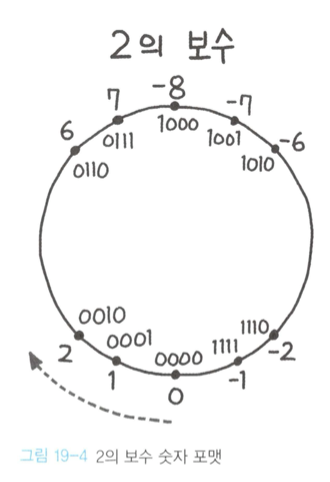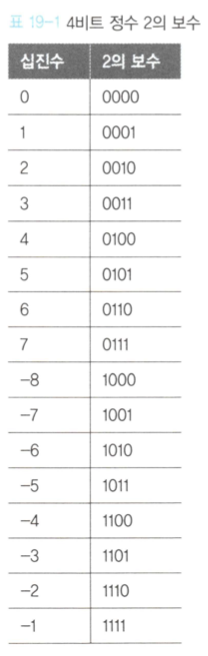

In [31]:
MASK = 0xF

In [32]:
bin(1 & MASK)

'0b1'

In [33]:
bin(7 & MASK)

'0b111'

In [34]:
bin(-8 & MASK)

'0b1000'

In [35]:
bin(-7 & MASK)

'0b1001'

In [36]:
bin(-1 & MASK)

'0b1111'

### 70. 싱글 넘버 

딱 하나를 제외하고 모든 엘리먼트는 2개씩 있다. 1개인 엘리먼트를 찾아라.

예제 1
- 입력 : [2, 2, 1]
- 출력 : 1

예제 2
- 입력 : [4, 1, 2, 1, 2]
- 출력 : 4

### 풀이 1. XOR 풀이

단 1개의 엘리먼트를 찾는데 적당한 연산자가 있습니다. 베타적 (Exclusive) OR, 즉 XOR 이다.

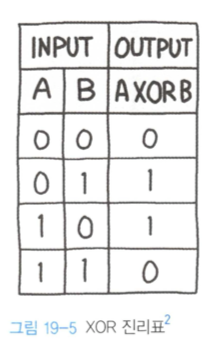

위 그림을 보면 알 수 있듯이 ,XOR은 입력값이 서로 다르면 True, 서로 동일한 경우 False가 되는 논리 게이트 연산자입니다.

이를 십진수에 적용해 보면 아래와 같습니다.

In [37]:
0 ^ 0

0

In [38]:
4 ^ 0

4

In [39]:
4 ^ 4

0

즉, 두 번 등장한 엘리먼트는 0으로 초기화 되고 한 번만 등장하는 엘리먼트는 그 값을 온전히 보존합니다.

즉, 배열의 모든 값을 XOR 하면, 단 한 번만 등장하는 엘리먼트만 그 값으로 남게 됩니다.

그렇다면 이를 이용하면 문제를 쉽게 풀이 할 수 있습니다.

In [40]:
def singleNumber(self, nums):
    result = 0
    for num in nums:
        result ^= num

    return result

In [41]:
nums1 = [2, 2, 1]
nums2 = [4, 1, 2, 1, 2]

In [42]:
singleNumber(None, nums1)

1

In [43]:
singleNumber(None, nums2)

4

### 71. 해밍거리

두 정수를 입력 받아 몇 비트가 다른지 계산하라.

- input : x = 1, y = 4
- output : 2

- 설명 : 1 (0001) 4 (0100) 좌 측에 있는 둘을 비교해보면, 왼쪽에서 2번째와 4번째 비트가 다르므로 정답은 2입니다.

풀이 1. XOR 풀이

In [44]:
def hammingDistance(self, x, y):
    return bin(x ^ y).count('1')

In [45]:
x = 1
y = 4

In [46]:
hammingDistance(None, x, y)

2

x ^ y XOR 의 결과는 정수가 나오므로, 이를 bin()을 이용해서 이진수로 변경하고, 여기서 1의 전체 개수를 헤아리면 다른 자리의 수, 즉 해밍 거리 값이 나옵니다.

### 72. 두 정수의 합

두 정수 a 와 b의 합을 구하라. + 또는 - 연산자는 사용할 수 없습니다.

예제 1
- input : a = 1, b = 2
- output : 3

예제 1
- input : a = -2, b = 3
- output : 1

### 풀이 1. 전가산기 구현

두 정수의 합을 구하는데 덧셈이나 뺄셈을 사용할 수 없기 때문에, 비트 연산만으로 풀이해야하는 문제입니다.

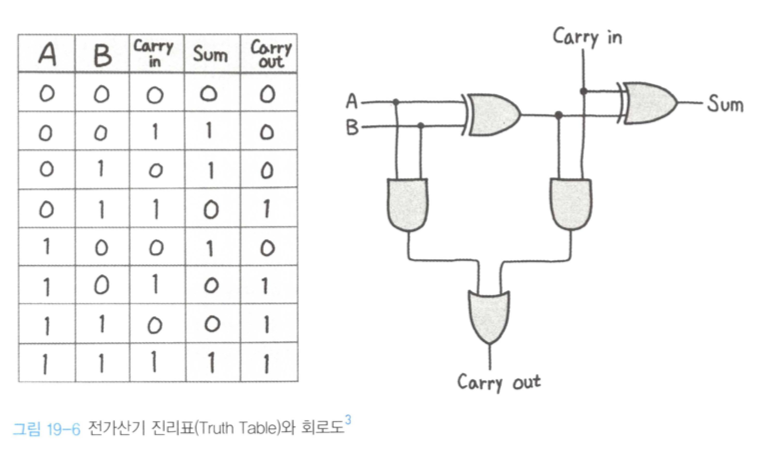

위의 그림은 우측 전가산기 회로도는 AND 게이트 2개, XOR 게이트 2개, OR 게이트 1개로 이뤄져 있습니다.

이 그림에서 각 게이트 위치에 중간값을 Q1, Q2, Q3로 파란색 글씨로 아래의 그림과 같이 마킹해보도록 하겠습니다.

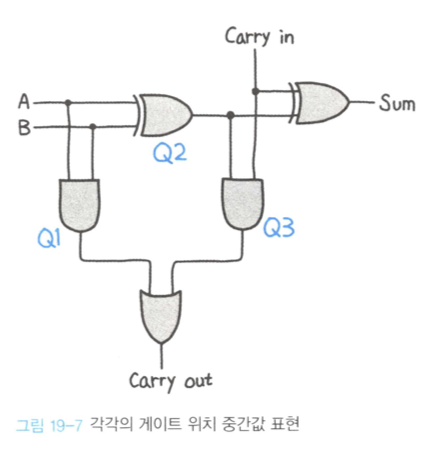

위 그림의 중간값 변수 Q1, Q2, Q3에 회로도의 ㅇ녀산을 통해 직접 계산 해 본 것을 파이썬 코드로 구현해 보면 다음과 같습니다.

Q1 = A & B  
Q2 = A ^ B  
Q3 = Q2 & carry  
sum = carry ^ Q2   
carry = Q1 | Q3  

각각의 비트는 이렇게 전가산기를 통해 합 sum을 구하는 로직으로 처리 할 수 있게 되었습니다.

이를 위한 전처리는 아래와 같이 진행 됩니다.

MASK = 0xFFFFFFFF   
a_bin = bin(a & MASK)[2:].zfill(32)  

a 정수를 a_bin이라는 이진수로 변경하는데 몇 가지 전처리 작업이 진행했습니다.

하나씩 살펴보면, 먼저 bin() 함수는 십진수 10을 이진수 0b1010으로 변환해줍니다.

bin(10) -> '0b1010'

이 때 파이썬에서는 이진수로 변환하면, 앞에 0b 식별자가 항상 붙습니다.

하지만, 필요 없는 값이므로, 슬라이싱 bin(a)[2:]로 이 부분을 떼내어 줍니다.

그 다음으로 a & MASK는 앞서 살펴본 마스킹 작업입니다.

MASK는 비트 마스크로, 음수 처리를 위해 2의 보수로 만들어주는 역할을 합니다.

여기에서 입력값을 32비트 정수로 가정했으므로 MASK는 0xFFFFFFFF 로 했으며, 이 값을 AND 연산을 해주면 아래와 같이 2의 보수 값을 취하게 됩니다.

In [47]:
bin(1 & MASK)

'0b1'

양수인 경우 마스킹을 해도 동일합니다.

In [48]:
bin(-1 & MASK)

'0b1111'

하지만 음수인 -1은 2의 보수에서 가장 큰 값이기 떄문에, 이처럼 마스킹을 할 경우 32비트전체가 1로 가득 채워지는 모습을 확인 할 수 있습니다.

In [49]:
# .zfill(32)로 32 비트 전체가 1로 꽉 채워줍니다.
'1'.zfill(32)

'00000000000000000000000000000001'

In [54]:
def getSum1(self, a, b):
    MASK = 0xFFFFFFFF
    INT_MAX = 0x7FFFFFFF

    a_bin = bin(a & MASK)[2:].zfill(32)
    b_bin = bin(b & MASK)[2:].zfill(32)

    result = []
    carry = 0
    sum = 0
    for i in range(32):
        A = int(a_bin[31 - i])
        B = int(b_bin[31 - i])

        # 전가산기 구현
        Q1 = A & B
        Q2 = A ^ B
        Q3 = Q2 & carry
        sum = carry ^ Q2
        carry = Q1 | Q3

        result.append(str(sum))
    if carry == 1:
        result.append('1')

    # 초과 자릿수 처리
    result = int(''.join(result[::-1]), 2) & MASK
    # 음수 처리
    if result > INT_MAX:
        result = ~(result ^ MASK)

    return result

In [57]:
a = 1
b = 2

In [58]:
getSum1(None, a, b)

3

In [59]:
a = -2
b = 3

In [60]:
getSum1(None, a, b)

1

In [61]:
def getSum2(self, a, b) -> int:
    MASK = 0xFFFFFFFF
    INT_MAX = 0x7FFFFFFF
    # 합, 자릿수 처리
    while b != 0:
        a, b = (a ^ b) & MASK, ((a & b) << 1) & MASK

    # 음수 처리
    if a > INT_MAX:
        a = ~(a ^ MASK)
    return a

In [62]:
getSum2(None, a, b)

1

### 73.

In [ ]:
def validUtf8(self, data):
    # 문자 바이트 만큼 10으로 시작 판별
    def check(size):
        for i in range(start + 1, start + size + 1):
            if i >= len(data) or (data[i] >> 6) != 0b10:
                return False
        return True

    start = 0
    while start < len(data):
        # 첫 바이트 기준 총 문자 바이트 판별
        first = data[start]
        if (first >> 3) == 0b11110 and check(3):
            start += 4
        elif (first >> 4) == 0b1110 and check(2):
            start += 3
        elif (first >> 5) == 0b110 and check(1):
            start += 2
        elif (first >> 7) == 0:
            start += 1
        else:
            return False
    return True

### 74.

In [ ]:
def hammingWeight(self, n):
    return bin(n).count('1')

In [ ]:
def hammingWeight(self, n: int) -> int:
    count = 0
    while n:
        # 1을 뺀 값과 AND 연산 횟수 측정
        n &= n - 1
        count += 1
    return count